<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/EMNIST_balanced_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd


Cargamos los datos como .csv, usamos la base balanceada por simplicidad.. Se tarda algo en subirse a la sesión de colab.
Utilizamos $pandas$ para leerlos.

In [2]:
train_df = pd.read_csv('emnist-balanced-train.csv', header=None)
train_df.head()#Se ven algo así.

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
X_test = test_df.loc[:, 1:]
y_test = test_df.loc[:, 0]
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

Creamos un diccionario para establecer una relación entre la etiqueta en la base, y el objeto alfanumérico que representa la etiqueta.

In [39]:
label_map = pd.read_csv("mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

Ejemplo de cómo se ve una de las imágenes.

Label entry 42: N


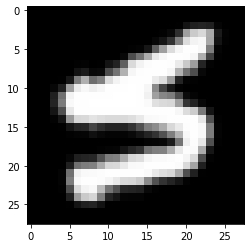

In [10]:
import matplotlib.pyplot as plt

sample_image = X_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [40]:
X_train = X_train.astype('float32') / 255

In [41]:
import numpy as np
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)

    return image
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train = X_train.reshape(-1, 28, 28, 1)


In [42]:
X_test=X_test.astype('float32') / 255
X_test = np.apply_along_axis(reshape_and_rotate, 1, X_test.values)
X_test = X_test.reshape(-1, 28, 28, 1)

In [44]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [46]:
from keras import layers
from keras import models
convNN = models.Sequential()

In [47]:
convNN.add(layers.Conv2D(filters     =256, 
                         kernel_size =3, 
                         activation  ='relu', 
                         input_shape =(28, 28, 1)))#28-2
convNN.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))#26-2
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))#24/2
convNN.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))#12-2
convNN.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))#10-2
convNN.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))#8-2
convNN.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))#6-2
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))#4/2
convNN.add(layers.Conv2D(filters=47, kernel_size=2, activation='softmax'))#2-1

In [48]:
convNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 256)       2560      
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 256)       590080    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 128)       295040    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 64)          73792     
                                                      

Hasta ahora, utilizando puras convolucionales (Maxpooling es un caso particular de convolucioal, cuando se considera el máximo del "parche")
tenemos una capa de salida de $1\times 1\times 47$, donde $47$ es el número de categorías

In [49]:
keras.layers.Flatten(data_format=None)
convNN.add(layers.Flatten())

Agregamos una capa $Flatten$ para hacer un reshape de la última capa a una matriz $batch\times 47$.

In [50]:
convNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 256)       2560      
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 256)       590080    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 128)       295040    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 64)          73792     
                                                      

Utilizaremos la función de pérdida "categorical_crossentropy" y $ADAM$ como optimizador.

In [52]:
convNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Consideramos $batch=64$ y 5 epocas para mantener los tiempos de ejecución bajos.

In [53]:
import time
tic = time.time()

convNN.fit(x = X_train, 
           y = train_labels, 
           epochs    =5,
           batch_size=64,
           verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/5
1763/1763 - 39s - loss: 0.7359 - accuracy: 0.7676 - 39s/epoch - 22ms/step
Epoch 2/5
1763/1763 - 39s - loss: 0.3920 - accuracy: 0.8616 - 39s/epoch - 22ms/step
Epoch 3/5
1763/1763 - 38s - loss: 0.3409 - accuracy: 0.8780 - 38s/epoch - 22ms/step
Epoch 4/5
1763/1763 - 38s - loss: 0.3117 - accuracy: 0.8851 - 38s/epoch - 22ms/step
Epoch 5/5
1763/1763 - 38s - loss: 0.2892 - accuracy: 0.8922 - 38s/epoch - 22ms/step
seconds= 192.5994713306427


Desempeño con datos de prueba y métricas.

In [54]:
import numpy as np

test_predicted_labels = convNN.predict(X_test)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

588/588 [==============================] - 3s 4ms/step


Graficamos la matriz de confusión.

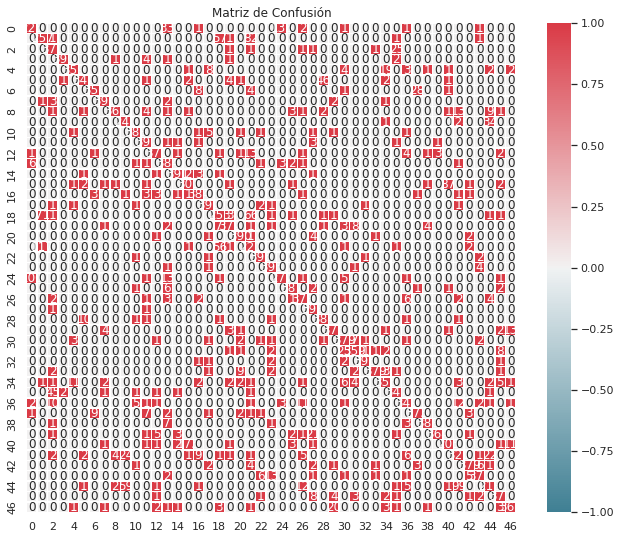

In [55]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5,vmin=-1,vmax=1)
ax.set_title('Matriz de Confusión')
plt.show()

Utilizamos las funciones de $keras$ para calcular las métricas de "Acuracy", "precision", "recall" y "F1-Score" vistas en clase.

In [58]:
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_true_labels, test_predicted_labels,average='weighted')
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = recall_score(test_true_labels, test_predicted_labels,average='weighted')
print('Recall:' , recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_true_labels, test_predicted_labels,average='weighted')
print('F1 score:' , f1)

Accuracy: 0.874521
Precision: 0.8773626597027993
Recall: 0.8745212765957446
F1 score: 0.8739253505353131
